In [35]:
# Import package for getting dataset example
import wooldridge as woo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descriptive Analysis

## A. Discrete Distributions: Frequencies and Contingency Tables

In [36]:
affairs = woo.dataWoo('affairs') # Return dataframe
print(affairs.info())
affairs.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        601 non-null    int64  
 1   male      601 non-null    int64  
 2   age       601 non-null    float64
 3   yrsmarr   601 non-null    float64
 4   kids      601 non-null    int64  
 5   relig     601 non-null    int64  
 6   educ      601 non-null    int64  
 7   occup     601 non-null    int64  
 8   ratemarr  601 non-null    int64  
 9   naffairs  601 non-null    int64  
 10  affair    601 non-null    int64  
 11  vryhap    601 non-null    int64  
 12  hapavg    601 non-null    int64  
 13  avgmarr   601 non-null    int64  
 14  unhap     601 non-null    int64  
 15  vryrel    601 non-null    int64  
 16  smerel    601 non-null    int64  
 17  slghtrel  601 non-null    int64  
 18  notrel    601 non-null    int64  
dtypes: float64(2), int64(17)
memory usage: 89.3 KB
None


,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,affair,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel
0,4,1,37.0,10.0,0,3,18,7,4,0,0,0,1,0,0,0,0,1,0
1,5,0,27.0,4.0,0,4,14,6,4,0,0,0,1,0,0,0,1,0,0
2,6,1,27.0,1.5,0,3,18,4,4,3,1,0,1,0,0,0,0,1,0
3,11,0,32.0,15.0,1,1,12,1,4,0,0,0,1,0,0,0,0,0,0
4,12,0,27.0,4.0,1,3,17,1,5,3,1,1,0,0,0,0,0,1,0


In [37]:
# In this example, we will use variables 'kids', and 'ratemarr'
# 'kids' represent already have kids or not => Let it as X variable
# 'ratemarr' represent the rating happy-or-not their marriage  => Let it as Y variable

# Prepare X variable
X = affairs['kids'].apply(lambda x: 'no' if x == 0 else 'yes')

# Prepare Y variable
map_ratemarr = {1: 'very unhappy',
                2: 'unhappy',
                3: 'average',
                4:'happy',
                5:'very happy'}

Y = affairs['ratemarr'].apply(lambda x: map_ratemarr[x])
Y.name = 'marriage'

# Frequency table with numpy
freq_table_np = np.unique(Y.values, return_counts=True)
unique_elem_np = freq_table_np[0]
counts_np = freq_table_np[1]
print("Frequency Table with Numpy: ")
print(f"Unique element: {unique_elem_np}")
print(f"Count or Frequency: {counts_np}")

# Frequency table with pandas
freq_table_pd = Y.value_counts()
print("\nFrequency Table with Pandas: ")
print(freq_table_pd)

# Frequency table with groupby
freq_table_grp = Y.groupby(X).value_counts()
print("\nFrequency Table with Groupby: ")
print(freq_table_grp)

# Contingency table
ct_abs = pd.crosstab(Y, X, margins=3)
print("\nCross Tabulation: ")
print(ct_abs)

ct_all_rel = pd.crosstab(Y, X, normalize='all')
print("\nCross Tabulation Normalize Total Elements: ")
print(ct_all_rel)

ct_row = pd.crosstab(Y, X, normalize='index')
print("\nCross Tabulation Normalize Total in Row: ")
print(ct_row)

ct_col = pd.crosstab(Y, X, normalize='columns')
print("\nCross Tabulation Normalize Total in Column: ")
print(ct_col)

Frequency Table with Numpy: 
Unique element: ['average' 'happy' 'unhappy' 'very happy' 'very unhappy']
Count or Frequency: [ 93 194  66 232  16]

Frequency Table with Pandas: 
marriage
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: count, dtype: int64

Frequency Table with Groupby: 
kids  marriage    
no    very happy       96
      happy            40
      average          24
      unhappy           8
      very unhappy      3
yes   happy           154
      very happy      136
      average          69
      unhappy          58
      very unhappy     13
Name: count, dtype: int64

Cross Tabulation: 
kids           no  yes  All
marriage                   
average        24   69   93
happy          40  154  194
unhappy         8   58   66
very happy     96  136  232
very unhappy    3   13   16
All           171  430  601

Cross Tabulation Normalize Total Elements: 
kids                no       yes
marriage                      

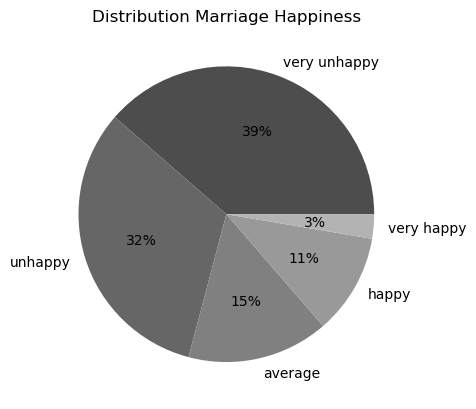

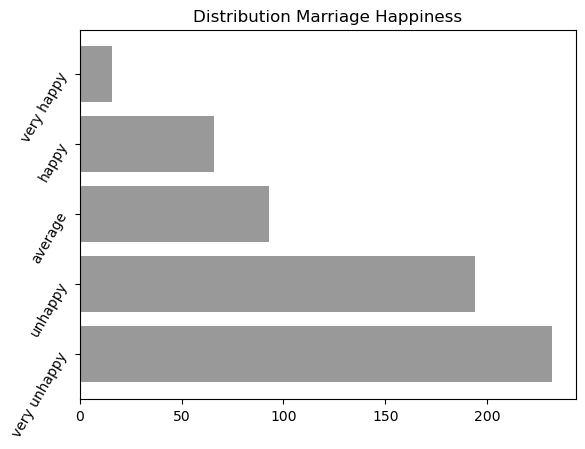

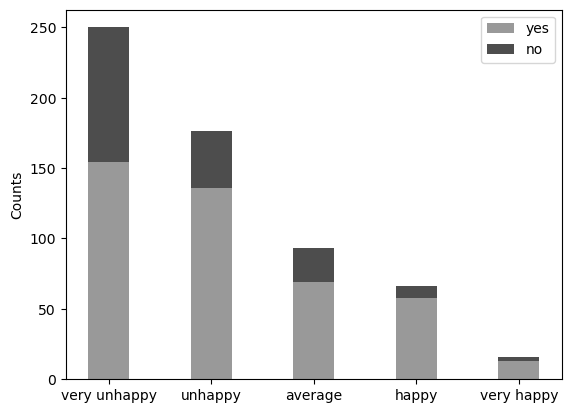

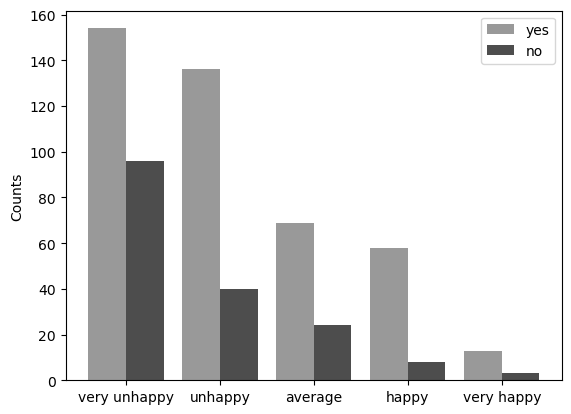

In [53]:
# Visualize it

counts = Y.value_counts()
counts_bykids = Y.groupby(X).value_counts()
counts_yes  = counts_bykids['yes']
counts_no = counts_bykids['no']

labels_y = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
# Pie chart (a)
plt.title("Distribution Marriage Happiness")
grey_colors = ['0.3', '0.4', '0.5', '0.6', '0.7']
plt.pie(counts, labels=labels_y, colors=grey_colors, autopct='%.0f%%')
plt.show()

# Horizontal bar chart (b)
y_pos = [0, 1, 2, 3, 4]
plt.title("Distribution Marriage Happiness")
plt.barh(y_pos, counts, color='0.6')
plt.yticks(y_pos, labels_y, rotation=60)
plt.show()

# Stacked bar plot
x_pos = [0, 1, 2, 3, 4]
## The first bar
plt.bar(x_pos, counts_yes, width=0.4, color='0.6', label='yes')
## The second bar
plt.bar(x_pos, counts_no, width=0.4, 
        color='0.3', label='no', bottom=counts_yes,)
plt.ylabel("Counts")
plt.xticks(x_pos, labels_y)
plt.legend()
plt.show()

# Grouped bar plot
x_pos_leftbar = [-0.2, 0.8, 1.8, 2.8, 3.8]
## The first bar
plt.bar(x_pos_leftbar, counts_yes, width=0.4, color='0.6', label='yes')
## The second bar
x_pos_rightbar = [0.2, 1.2, 2.2, 3.2, 4.2]
plt.bar(x_pos_rightbar, counts_no, width=0.4, 
        color='0.3', label='no')
plt.ylabel("Counts")
plt.xticks(x_pos, labels_y)
plt.legend()
plt.show()